# Import the libraries:

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Load the training dataset:

In [3]:
dataset_train = pd.read_csv("C:\\Users\\Bhramar\\Downloads\\Google_Stock_Price_Train.csv")
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
training_set = dataset_train.iloc[:,1:2].values
print(training_set)
print(training_set.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 1)


# Normalizing the dataset:

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

# Creating x_train and y_train data structures:

In [6]:
x_train = []
y_train = []
for i in range(60,1258):
    x_train.append(scaled_training_set[i-60:i,0])
    y_train.append(scaled_training_set[i,0])
x_train = np.array(x_train)
y_train = np.array(y_train)

print(x_train.shape)
print(y_train.shape)

(1198, 60)
(1198,)


In [7]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1198, 60, 1)

# Importing libraries and layers for LSTM:

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# LSTM model:

In [9]:
#building the model

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences=True, input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1))

In [10]:
#fitting the model

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
38/38 [==============================] - 38s 259ms/step - loss: 0.0336
Epoch 2/100
38/38 [==============================] - 10s 249ms/step - loss: 0.0063
Epoch 3/100
38/38 [==============================] - 9s 240ms/step - loss: 0.0056
Epoch 4/100
38/38 [==============================] - 9s 231ms/step - loss: 0.0056
Epoch 5/100
38/38 [==============================] - 10s 252ms/step - loss: 0.0052
Epoch 6/100
38/38 [==============================] - 11s 281ms/step - loss: 0.0054
Epoch 7/100
38/38 [==============================] - 11s 290ms/step - loss: 0.0047
Epoch 8/100
38/38 [==============================] - 9s 248ms/step - loss: 0.0046
Epoch 9/100
38/38 [==============================] - 9s 225ms/step - loss: 0.0043
Epoch 10/100
38/38 [==============================] - 10s 264ms/step - loss: 0.0048
Epoch 11/100
38/38 [==============================] - 10s 260ms/step - loss: 0.0041
Epoch 12/100
38/38 [==============================] - 10s 273ms/step - loss: 0.0042
Epoch

# Loading the test dataset:

In [11]:
dataset_test = pd.read_csv("C:\\Users\\Bhramar\\Downloads\\Google_Stock_Price_Test.csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

# Preparing the input for model:

In [14]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60,80):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

# Predicting values for Jan 2017 stock prices:

In [15]:
predicted_stock_price = regressor.predict(x_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

1/1 [==============================] - 6s 6s/step


# Plotting actual and predicted prices for Google stocks:

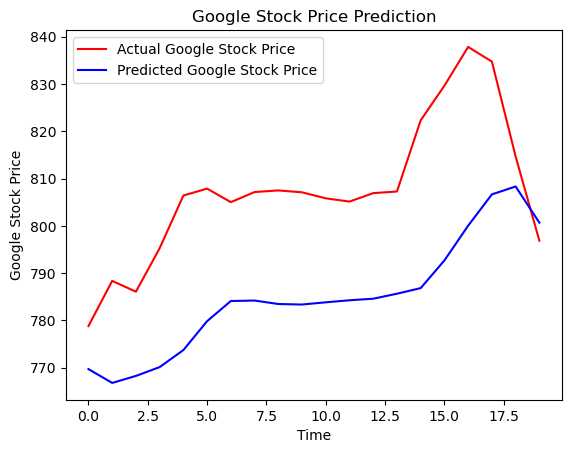

In [17]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()